## importing libraries

In [115]:
# lets import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## the datasets

In [116]:
# lets save this df as "life expectancy in india" file
df = pd.read_csv('Life Expectancy in India.csv')
df

,Unnamed: 0,Rank,State,Life_Expectancy_at_Birth,Avg_Life_Expectancy,Male,Female,Literacy_Rate,Undernutrition,Pollution_SO2,Pollution_NO2,Pollution_PM10,Avg_tobacco_alcohol(%),Women_tobacco_alcohol(%),Men_tobacco_alcohol (%),Rural+Urban_Person,Rural+Urban_Male,Rural+Urban_Female
0,0,13,Andhra Pradesh,68.5,70.25,68.4,72.1,67.66,32.5,7,23,73,14.05,2.100,26.00,35,30,43
1,1,21,Assam,63.9,66.20,65.6,66.8,73.18,36.4,8,16,81,42.50,19.250,65.95,64,43,149
2,2,14,Bihar,68.1,69.90,69.6,70.2,63.82,55.9,4,32,212,28.33,3.820,52.85,70,61,119
3,3,18,Chhattisgarh,64.8,63.60,61.6,65.7,71.04,47.1,10,24,103,39.50,21.070,58.05,28,32,6
4,4,3,Delhi,73.2,72.85,71.8,73.9,86.34,26.1,7,66,278,17.84,2.150,33.53,52,40,138
5,5,11,Gujarat,68.7,69.50,67.4,71.8,79.31,44.6,14,24,98,30.47,7.500,53.45,12,10,18
6,6,12,Haryana,68.6,69.60,68.0,71.4,76.64,39.6,9,23,101,20.33,2.200,38.70,48,43,80
7,7,5,Himachal Pradesh,71.6,72.30,69.4,75.5,83.78,36.5,3,13,81,20.02,0.750,39.30,75,69,85
8,8,2,Jammu & Kashmir,73.6,73.50,71.6,76.2,68.74,25.6,4,17,131,22.45,3.250,41.34,105,80,242
9,9,16,Jharkhand,66.6,66.15,65.5,66.8,67.63,56.5,22,38,174,28.90,6.580,51.27,74,66,120


In [117]:
# lets see the dataframe informationb
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                21 non-null     int64  
 1   Rank                      21 non-null     int64  
 2   State                     21 non-null     object 
 3   Life_Expectancy_at_Birth  21 non-null     float64
 4   Avg_Life_Expectancy       21 non-null     float64
 5   Male                      21 non-null     float64
 6   Female                    21 non-null     float64
 7   Literacy_Rate             21 non-null     float64
 8   Undernutrition            21 non-null     float64
 9   Pollution_SO2             21 non-null     int64  
 10  Pollution_NO2             21 non-null     int64  
 11  Pollution_PM10            21 non-null     int64  
 12  Avg_tobacco_alcohol(%)    21 non-null     float64
 13  Women_tobacco_alcohol(%)  21 non-null     float64
 14  Men_tobacco_

In [118]:
# lets add all the pollution values and save it in one column
df['Pollution_SO2'] = df['Pollution_SO2'] + df['Pollution_NO2'] + df['Pollution_PM10']
df.rename(columns={'Pollution_SO2':'Pollution', 'Avg_tobacco_alcohol(%)':'Bad_Habits(%)', 'Rural+Urban_Person':'Unemployment/1000', 'Life_Expectancy_at_Birth':'Life_Expectancy'}, inplace=True)

In [119]:
# lets drop all the unwanted columns
df.drop(columns=['Unnamed: 0', 'Rank', 'Avg_Life_Expectancy', 'Male', 'Female', 'Pollution_NO2', 'Pollution_PM10', 'Women_tobacco_alcohol(%)', 'Men_tobacco_alcohol (%)', 'Rural+Urban_Male', 'Rural+Urban_Female'], inplace=True)
df.head()

,State,Life_Expectancy,Literacy_Rate,Undernutrition,Pollution,Bad_Habits(%),Unemployment/1000
0,Andhra Pradesh,68.5,67.66,32.5,103,14.05,35
1,Assam,63.9,73.18,36.4,105,42.50,64
2,Bihar,68.1,63.82,55.9,248,28.33,70
3,Chhattisgarh,64.8,71.04,47.1,137,39.50,28
4,Delhi,73.2,86.34,26.1,351,17.84,52


## feature engineering

In [120]:
# lets see the relationships between columns
df.describe()

,Life_Expectancy,Literacy_Rate,Undernutrition,Pollution,Bad_Habits(%),Unemployment/1000
count,21.000000,21.000000,21.000000,21.00000,21.000000,21.000000
mean,68.990476,75.483810,38.700000,164.00000,26.124762,55.714286
std,3.278095,7.426716,10.233523,68.23269,8.922130,26.952074
min,63.900000,63.820000,22.900000,63.00000,11.480000,12.000000
25%,66.600000,69.740000,32.500000,112.00000,20.020000,35.000000
50%,68.700000,75.600000,38.000000,149.00000,24.500000,58.000000
75%,71.600000,79.630000,42.400000,207.00000,31.800000,70.000000
max,74.900000,93.910000,60.000000,351.00000,42.500000,118.000000


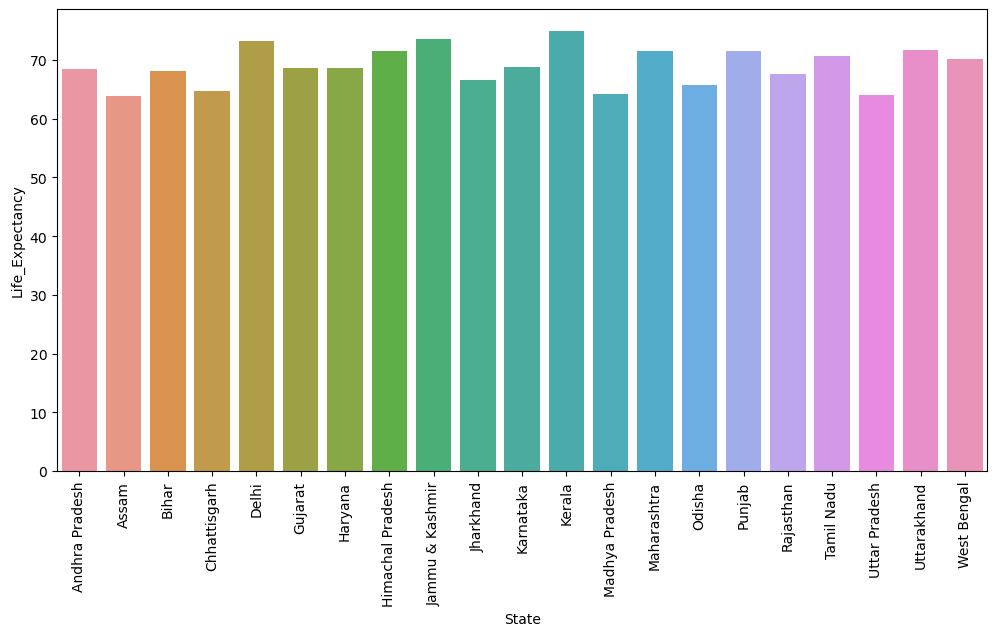

In [121]:
# lets plot a graph between Life-expectancy vs literacy-rate
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.barplot(y = 'Life_Expectancy', x = 'State', data = df)
plt.show()

In [122]:
# lets see the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              21 non-null     object 
 1   Life_Expectancy    21 non-null     float64
 2   Literacy_Rate      21 non-null     float64
 3   Undernutrition     21 non-null     float64
 4   Pollution          21 non-null     int64  
 5   Bad_Habits(%)      21 non-null     float64
 6   Unemployment/1000  21 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.3+ KB


In [123]:
# lets define a column transformer to for feature transforming
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse=False), ['State']),
    ('st_scaler', StandardScaler(), ['Literacy_Rate', 'Undernutrition', 'Bad_Habits(%)']),
    ('normalizer', MinMaxScaler(), ['Pollution', 'Unemployment/1000'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['State']),
                                ('st_scaler', StandardScaler(),
                                 ['Literacy_Rate', 'Undernutrition',
                                  'Bad_Habits(%)']),
                                ('normalizer', MinMaxScaler(),
                                 ['Pollution', 'Unemployment/1000'])])

In [124]:
# lets, transform data first
df_inputs = df.drop(columns=['Life_Expectancy'])
df_inputs_transformed = transformer.fit_transform(df_inputs)

C:\Users\Madhavz\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [125]:
# lets split the data first
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_inputs_transformed, df[['Life_Expectancy']], test_size=0.2, random_state=70)
X_train.shape, X_test.shape

((16, 25), (5, 25))

## Model Building and Training

In [126]:
# lets use linear regression model
from sklearn.linear_model import Ridge

model = Ridge(alpha=3)
model.fit(X_train, y_train)

Ridge(alpha=3)

## Model Prediction and Evaluation

In [127]:
# lets import r2_score metric for evaluation
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r2_score(y_test, y_pred)

0.8924140181016007

## Try some predictions

In [188]:
# lets define a function which predicts the Life expectancy when a raw data is supplied to it
def predictor(raw_data):
    # raw_data is a dict of list      
    X = transformer.transform(pd.DataFrame(raw_data))
    y = np.round(model.predict(X), 2)
    for i in y:
        print(f'Life Expectancy in {raw_data["State"][np.where(y == i)[0][0]]} is {i[0]} years.')

In [189]:
raw_data = {'State': ['Odisha', 'Gujarat', 'Assam', 'Andhra Pradesh', 'Tamil Nadu'],
           'Literacy_Rate': [67, 87, 59, 75, 81],
            'Undernutrition': [34, 32, 45, 30, 29],
            'Pollution': [156, 187, 198, 210, 206],
            'Bad_Habits(%)': [22, 31, 28, 32, 28],
            'Unemployment/1000': [43, 32, 113, 67, 35]
           }
predictor(raw_data)

Life Expectancy in Odisha is 68.53 years.
Life Expectancy in Gujarat is 70.02 years.
Life Expectancy in Assam is 65.98 years.
Life Expectancy in Andhra Pradesh is 68.92 years.
Life Expectancy in Tamil Nadu is 69.86 years.
